
<strong>Libraries Used</strong>
<ul><li>pandas</li>
    <li>matplotlib</li>
    <li>seaborn</li>
    <li>numpy</li>
    <li>datetime</li>
    <li>folium</li>
    <li>bokeh</li>
</ul>


In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
url='https://drive.google.com/file/d/13r_BohVoKoVrgxJlpQTB0KV0piYvMfxv/view?usp=share_link'

Mounted at /content/gdrive


<h2>Data Acquisition</h2>

In [ ]:
# Loading the csv dataset into the df variable
df = pd.read_csv('/content/gdrive/MyDrive/Datasci/New_project.csv')

<h3>Scanning the data</h3>

In [ ]:
# The number of rows and columns in the dataset; returns a tuple
df.shape

(680363, 21)

In [ ]:
# Summary Statistics of the data
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,6.803630e+05,680363.000000,680363.000000,680339.000000,680363.000000,6.700020e+05,6.700020e+05,680363.000000,670002.000000,670002.000000
mean,1.274313e+07,1152.956755,11.300202,23.215215,36.547752,1.165295e+06,1.886713e+06,2022.034358,41.844722,-87.668923
std,7.654344e+05,706.463754,7.060942,14.050784,21.587495,1.663134e+04,3.210024e+04,0.804649,0.088287,0.060476
min,2.569900e+04,111.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,2021.000000,36.619446,-91.686566
25%,1.252599e+07,533.000000,5.000000,10.000000,22.000000,1.153775e+06,1.858995e+06,2021.000000,41.768480,-87.710841
50%,1.278623e+07,1032.000000,10.000000,24.000000,32.000000,1.167112e+06,1.892767e+06,2022.000000,41.861517,-87.662166
75%,1.303646e+07,1724.000000,17.000000,34.000000,53.000000,1.176822e+06,1.910004e+06,2023.000000,41.908858,-87.626603
max,1.329188e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951506e+06,2023.000000,42.022549,-87.524529


In [ ]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13284919,JG513466,11/22/2023 12:00:00 AM,072XX S SOUTH SHORE DR,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,False,...,3,7.0,43,1194918.0,1857750.0,2023,11/29/2023 03:40:59 PM,41.764582,-87.561127,POINT (-87.561127448 41.764581624)
1,13285955,JG514652,11/22/2023 12:00:00 AM,003XX S DAMEN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,12,27.0,28,1163119.0,1898512.0,2023,11/29/2023 03:40:59 PM,41.877161,-87.676537,POINT (-87.676536946 41.877161446)
2,13285802,JG514531,11/22/2023 12:00:00 AM,056XX W 63RD PL,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,...,8,13.0,64,1140005.0,1861899.0,2023,11/29/2023 03:40:59 PM,41.777144,-87.762299,POINT (-87.762299357 41.77714374)
3,13285923,JG513382,11/22/2023 12:00:00 AM,024XX W POLK ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,True,...,11,28.0,28,1160193.0,1896299.0,2023,11/29/2023 03:40:59 PM,41.871150,-87.687342,POINT (-87.687341534 41.871149707)
4,13289981,JG519426,11/22/2023 12:00:00 AM,037XX N KEDVALE AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,...,17,30.0,16,1148186.0,1924383.0,2023,11/29/2023 03:40:59 PM,41.948454,-87.730700,POINT (-87.730699545 41.9484545)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680358,12458145,JE343802,01/01/2021 12:00:00 AM,023XX N ASHLAND AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,18,2.0,7,1165277.0,1915788.0,2021,08/24/2021 03:39:44 PM,41.924522,-87.668122,POINT (-87.668121549 41.924522422)
680359,12581226,JE493833,01/01/2021 12:00:00 AM,074XX S DORCHESTER AVE,0890,THEFT,FROM BUILDING,SCHOOL - PUBLIC GROUNDS,False,False,...,3,8.0,43,1186830.0,1855927.0,2021,01/04/2022 03:40:28 PM,41.759775,-87.590829,POINT (-87.59082933 41.75977457)
680360,12527960,JE429398,01/01/2021 12:00:00 AM,004XX E ERIE ST,0890,THEFT,FROM BUILDING,RESIDENCE - GARAGE,False,False,...,18,42.0,8,1179370.0,1904874.0,2021,11/02/2021 03:40:06 PM,41.894262,-87.616673,POINT (-87.616673471 41.894262326)
680361,12305386,JE157211,01/01/2021 12:00:00 AM,008XX W AGATITE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,19,46.0,3,1169770.0,1929748.0,2021,03/04/2021 03:40:19 PM,41.962732,-87.651204,POINT (-87.65120424 41.962732398)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680363 entries, 0 to 680362
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    680363 non-null  int64  
 1   Case Number           680363 non-null  object 
 2   Date                  680363 non-null  object 
 3   Block                 680363 non-null  object 
 4   IUCR                  680363 non-null  object 
 5   Primary Type          680363 non-null  object 
 6   Description           680363 non-null  object 
 7   Location Description  677286 non-null  object 
 8   Arrest                680363 non-null  bool   
 9   Domestic              680363 non-null  bool   
 10  Beat                  680363 non-null  int64  
 11  District              680363 non-null  int64  
 12  Ward                  680339 non-null  float64
 13  Community Area        680363 non-null  int64  
 14  X Coordinate          670002 non-null  float64
 15  

In [ ]:
sns.set_style('darkgrid')

In [ ]:
# First 5 rows of our dataset
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13284919,JG513466,11/22/2023 12:00:00 AM,072XX S SOUTH SHORE DR,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,False,...,3,7.0,43,1194918.0,1857750.0,2023,11/29/2023 03:40:59 PM,41.764582,-87.561127,POINT (-87.561127448 41.764581624)
1,13285955,JG514652,11/22/2023 12:00:00 AM,003XX S DAMEN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,12,27.0,28,1163119.0,1898512.0,2023,11/29/2023 03:40:59 PM,41.877161,-87.676537,POINT (-87.676536946 41.877161446)
2,13285802,JG514531,11/22/2023 12:00:00 AM,056XX W 63RD PL,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,...,8,13.0,64,1140005.0,1861899.0,2023,11/29/2023 03:40:59 PM,41.777144,-87.762299,POINT (-87.762299357 41.77714374)
3,13285923,JG513382,11/22/2023 12:00:00 AM,024XX W POLK ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,True,...,11,28.0,28,1160193.0,1896299.0,2023,11/29/2023 03:40:59 PM,41.871150,-87.687342,POINT (-87.687341534 41.871149707)
4,13289981,JG519426,11/22/2023 12:00:00 AM,037XX N KEDVALE AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,...,17,30.0,16,1148186.0,1924383.0,2023,11/29/2023 03:40:59 PM,41.948454,-87.730700,POINT (-87.730699545 41.9484545)


<h4>What are our Features?</h4>

In [ ]:
# The names of the features
print("The names of the features :\n", list(df.columns))

The names of the features :
 ['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']


<h3>Number of Distinct Crimes in the city of Chicago in 2018</h3>

In [ ]:
# Number of distinct crimes in the city in 2021 to 2023
crimes = df['Primary Type'].unique()
print("The Number of distinct crimes in Chicago in the year 2021 to 2023:", len(crimes))
print()
print("The Distinct Crimes are :\n", crimes)

The Number of distinct crimes in Chicago in the year 2021 to 2023: 31

The Distinct Crimes are :
 ['BATTERY' 'CRIMINAL DAMAGE' 'MOTOR VEHICLE THEFT' 'OTHER OFFENSE'
 'OFFENSE INVOLVING CHILDREN' 'DECEPTIVE PRACTICE' 'ASSAULT' 'THEFT'
 'ROBBERY' 'BURGLARY' 'WEAPONS VIOLATION' 'CRIMINAL TRESPASS'
 'INTERFERENCE WITH PUBLIC OFFICER' 'CRIMINAL SEXUAL ASSAULT'
 'PUBLIC PEACE VIOLATION' 'NARCOTICS' 'SEX OFFENSE' 'LIQUOR LAW VIOLATION'
 'PUBLIC INDECENCY' 'HOMICIDE' 'CONCEALED CARRY LICENSE VIOLATION'
 'STALKING' 'INTIMIDATION' 'ARSON' 'KIDNAPPING' 'NON-CRIMINAL'
 'PROSTITUTION' 'HUMAN TRAFFICKING' 'OBSCENITY' 'GAMBLING'
 'OTHER NARCOTIC VIOLATION']


<h2>Dealing With Missing Values</h2>

In [ ]:
# What are the total missing values in the dataset ?
print("Number of Missing Values in the whole dataset : ", df.isna().sum().sum())

Number of Missing Values in the whole dataset :  54906


In [ ]:
# Let's count number of null entries per feature
missing_values = list(df.isna().sum())
# missing values is a list of the number of missing values in each column

cols = list(df.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values

print("Number of Missing Values per feature >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) # Making a custom dataframe from dict d
missing_vals.head()

Number of Missing Values per feature >>


,Others,Location Description,Ward,X Coordinate,Y Coordinate,Latitude,Longitude,Location
Missing Values,0,3077,24,10361,10361,10361,10361,10361


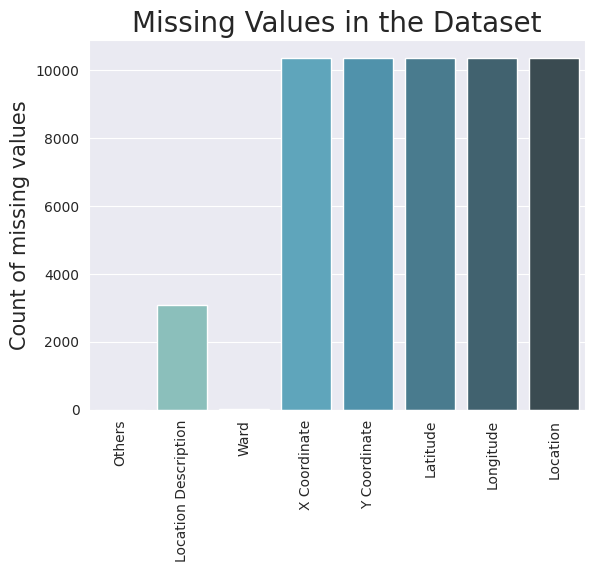

In [ ]:
# Plotting the missing values in the dataset
x = list(d.keys())
y = list(d.values())
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Missing Values in the Dataset", fontdict = {'fontsize': 20})
plt.ylabel("Count of missing values", fontdict={'fontsize': 15})
plt.show()

In [ ]:
# The simplest cleaning technique here would be to drop all the rows with atleast one missing value
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667478 entries, 0 to 680362
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    667478 non-null  int64  
 1   Case Number           667478 non-null  object 
 2   Date                  667478 non-null  object 
 3   Block                 667478 non-null  object 
 4   IUCR                  667478 non-null  object 
 5   Primary Type          667478 non-null  object 
 6   Description           667478 non-null  object 
 7   Location Description  667478 non-null  object 
 8   Arrest                667478 non-null  bool   
 9   Domestic              667478 non-null  bool   
 10  Beat                  667478 non-null  int64  
 11  District              667478 non-null  int64  
 12  Ward                  667478 non-null  float64
 13  Community Area        667478 non-null  int64  
 14  X Coordinate          667478 non-null  float64
 15  

In [ ]:
# How much of the data has been retained after this removal ?
print(round(625457 / 680363 * 100,2), "percentage of the data has been retained.")

91.93 percentage of the data has been retained.


In [ ]:
# Continuous Variables
cont = df._get_numeric_data().columns
print("The continuous variables are: ",list(cont))

The continuous variables are:  ['ID', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']


In [ ]:
# Categorical Variables
print("The categorical variables are: ",list(set(df.columns) - set(cont)))

The categorical variables are:  ['Location Description', 'Date', 'Description', 'Updated On', 'Case Number', 'Block', 'Primary Type', 'IUCR', 'Location']


<ipython-input-20-e36d70ebc288>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


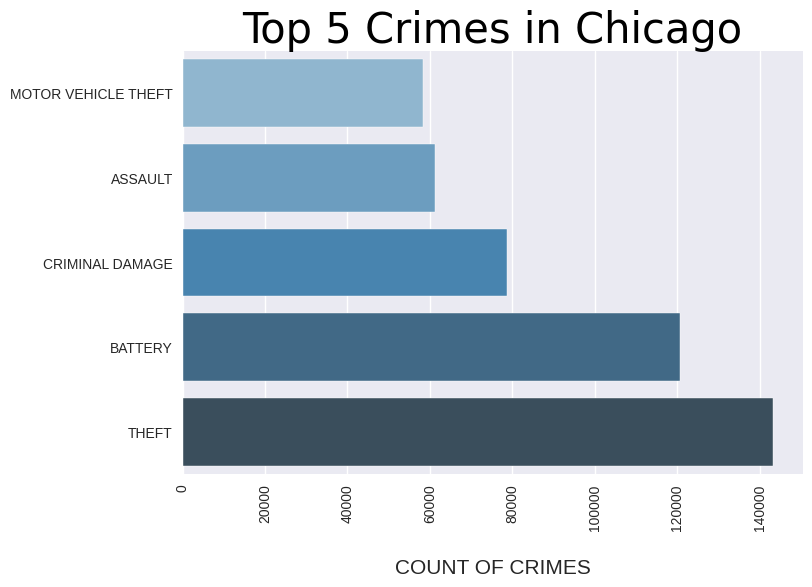

In [ ]:
# Set the style of the plot first
plt.style.use('seaborn')

# Filter out the Top 5 crimes
top_5_crimes = df['Primary Type'].value_counts().sort_values(ascending=False).head()

temp = df.groupby('Primary Type', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by=['ID'], ascending=False).head()
temp = temp.sort_values(by='ID', ascending=True)
sns.barplot(x='ID', y='Primary Type', data=temp, palette="Blues_d")

# Work on the aestehtic appeal of the plot
plt.title("Top 5 Crimes in Chicago", fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("\nCOUNT OF CRIMES", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()
#plt.show()

In [ ]:
# Doing a bit of df manipulation for using bokeh
temp.head()
temp.columns=['Crime','Number']
temp.index=[0,1,2,3,4]
temp['co-ordinates']=[1,2,3,4,5]
temp.head()

,Crime,Number,co-ordinates
0,MOTOR VEHICLE THEFT,58200,1
1,ASSAULT,61221,2
2,CRIMINAL DAMAGE,78717,3
3,BATTERY,120598,4
4,THEFT,143248,5


In [ ]:
# Making an interactive plot in Bokeh

from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

temp_cds = ColumnDataSource(temp)

fig1 = figure(width=700, height=400, title="Most occuring Criminal Offences in Chicago",
             x_axis_label="Count of Crimes", y_axis_label="Crime Type", x_range=(0, 70000))

fig1.title.align = "left"
fig1.title.text_color = "black"
fig1.title.text_font_size = "20px"

fig1.hbar(y='co-ordinates', right='Number', source=temp_cds, left=0, color='red', alpha=0.5, height=0.50)
fig1.yaxis.major_label_overrides = {5: 'Theft', 4:'Battery', 3:'Criminal Damage', 2:'Assault',
                                   1:'MOTOR VEHICLE THEFT'}

# Adding passive interactivity
tooltips = [
    ('Number of Crimes', '@Number'),
]

#fig1.legend.location
fig1.add_tools(HoverTool(tooltips=tooltips))

output_notebook()
show(fig1)

In [ ]:
# Testing out the time and date conversion for one entry

t = df['Date'][20]
print(t)
s1 = t[:11]
print(s1)
s2 = t[11:]
print(s2)

print(s2)
hr = s2[:2]
mins = s2[3:5]
sec = s2[6:8]
time_frame = s2[9:]
if(time_frame == 'PM'):
    if (int(hr) != 12):
        hr = str(int(hr) + 12)
else:
    if(int(hr) == 12):
        hr = '00'

print(hr, mins, sec)

11/21/2023 11:36:00 PM
11/21/2023 
11:36:00 PM
11:36:00 PM
23 36 00


In [ ]:
# Testing out code

month = s1[:2]
date = s1[3:5]
year = s1[6:10]

final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
print(final_date)

2023-11-21 23:36:00


<h4>Convert the date-time column to a known format - Applying the above code onto our data</h4>

In [ ]:
# Time Conversion Function
def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]

    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]

    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'

    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date

In [ ]:
# Using apply() of pandas to apply time_convert on every row of the Date column
df['Date'] = df['Date'].apply(time_convert)

<ipython-input-26-35bd5403b3de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(time_convert)


<h4>Create a new column "Month"</h4>

In [ ]:
def month(x):
    return x.strftime("%B")
df['Month'] = df['Date'].apply(month)

<ipython-input-27-ad68f18a0c02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].apply(month)


In [ ]:
# Frequency of the most occuring crimes over the year 2021-2023

theft_dict ={} # dictionary
battery_dict = {}
crim_dam = {}
assault = {}
mot_vehi = {}

months = df["Month"].unique()
for month in months :
    theft_dict[month]=0
    battery_dict[month]=0
    crim_dam[month]=0
    assault[month]=0
    mot_vehi[month]=0

for elem in df[df["Primary Type"]=="THEFT"]["Month"]:
    if elem in theft_dict.keys():
        theft_dict[elem] += 1

for elem in df[df["Primary Type"]=="BATTERY"]["Month"]:
    if elem in battery_dict.keys():
        battery_dict[elem] += 1

for elem in df[df["Primary Type"]=="CRIMINAL DAMAGE"]["Month"]:
    if elem in crim_dam.keys():
        crim_dam[elem] += 1

for elem in df[df["Primary Type"]=="ASSAULT"]["Month"]:
    if elem in assault.keys():
        assault[elem] += 1

for elem in df[df["Primary Type"]=="DECEPTIVE PRACTICE"]["Month"]:
    if elem in mot_vehi.keys():
        mot_vehi[elem] += 1


# Let's order the above dictionaries for proper plotting
months=['January','February','March','April','May','June','July','August','September','October','November','December']
theft_list = [(k,theft_dict[k]) for k in months]
battery_list = [(k,battery_dict[k]) for k in months]
crim_dam_list = [(k,crim_dam[k]) for k in months]
assault_list = [(k,assault[k]) for k in months]
dec_prac_list = [(k,mot_vehi[k]) for k in months]

<ipython-input-29-24add4dd97da>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


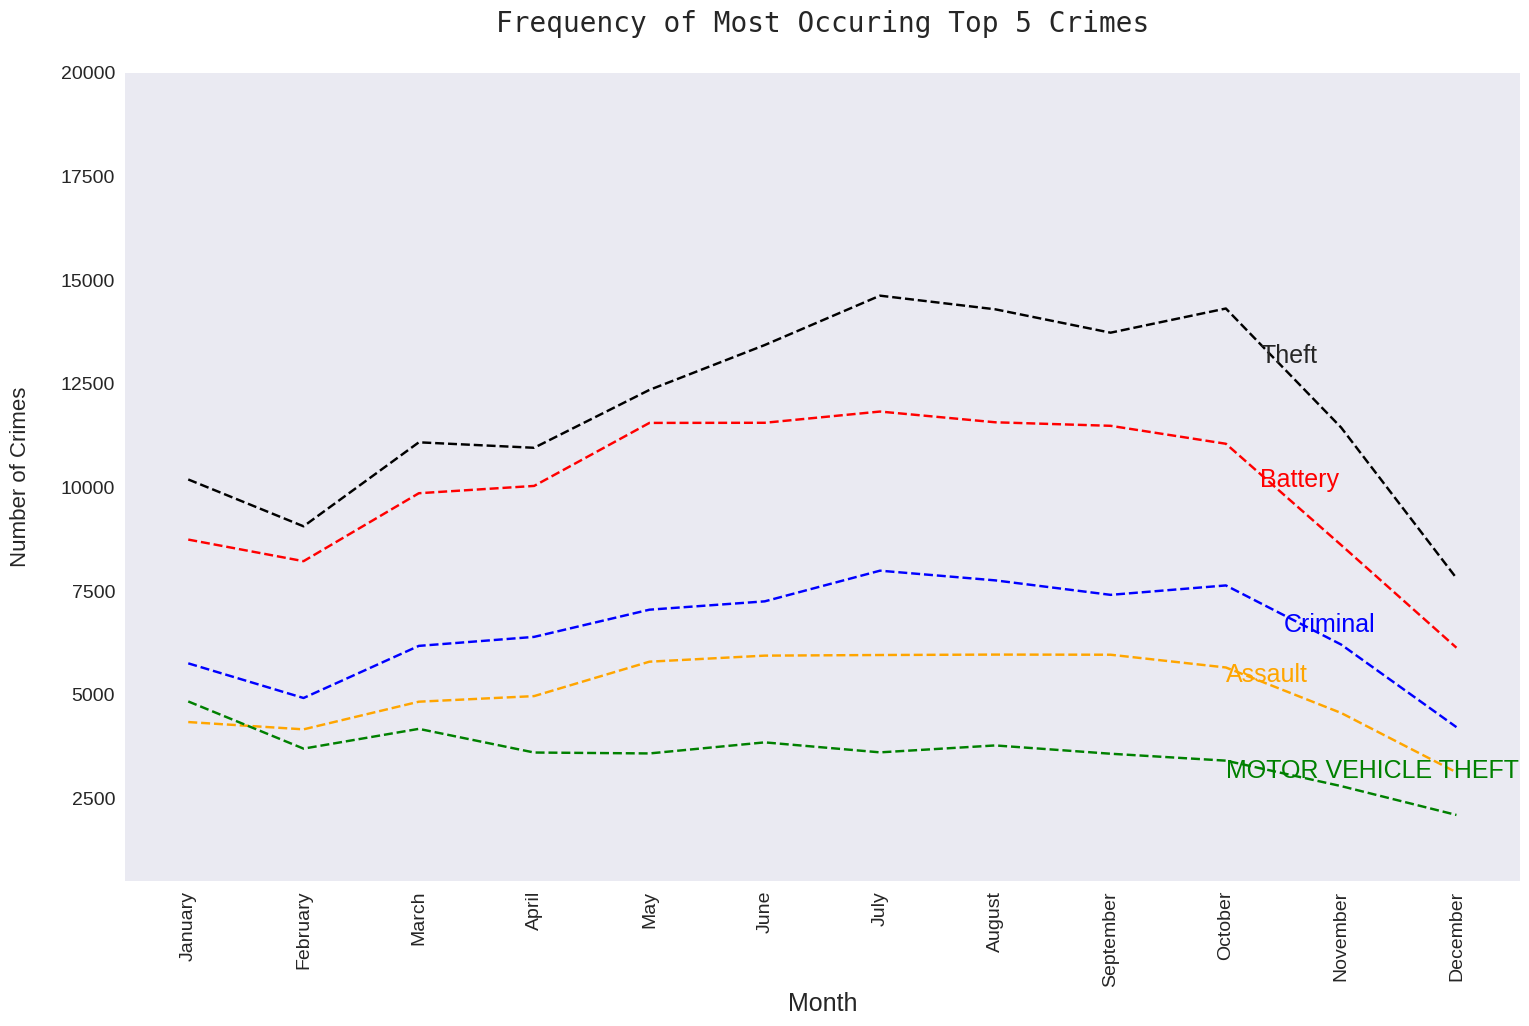

In [ ]:
# Plotting the graphs

plt.style.use('seaborn-dark')
#sns.set(rc={'axes.facecolor':'A0D7E6', 'figure.facecolor':'ffffff'})
fig, ax = plt.subplots(figsize=(18,10.5))

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# Setting the ticks only on the bottom and the left of the graph
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(500, 20000)

x = [z[0] for z in theft_list]
# print(x)
y = [z[1] for z in theft_list]
ax.plot(x,y, color="black")
ax.lines[0].set_linestyle("--")

x = [z[0] for z in battery_list]
y = [z[1] for z in battery_list]
ax.plot(x,y, color="red")
ax.lines[1].set_linestyle("--")

x = [z[0] for z in crim_dam_list]
y = [z[1] for z in crim_dam_list]
ax.plot(x,y, color="blue")
ax.lines[2].set_linestyle("--")

x = [z[0] for z in assault_list]
y = [z[1] for z in assault_list]
ax.plot(x,y, color="orange")
ax.lines[3].set_linestyle("--")

# x,y = zip(*dec_prac.items())
x = [z[0] for z in dec_prac_list]
y = [z[1] for z in dec_prac_list]
ax.plot(x,y, color="green")
ax.lines[4].set_linestyle("--")


for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.text(9.3,13000,"Theft",fontsize=18)
plt.text(9.3,10000,"Battery",fontsize=18,color="red")
plt.text(9.5,6500,"Criminal",fontsize=18,color="blue")
plt.text(9,5300,"Assault",fontsize=18,color="orange")
plt.text(9,3000,"MOTOR VEHICLE THEFT",fontsize=18,color="green")

ax.set_title("Frequency of Most Occuring Top 5 Crimes\n",fontname="monospace", fontsize=20)
ax.set_xlabel("Month", fontsize=18)
ax.set_ylabel("Number of Crimes\n", fontsize=16)

plt.show()

In [ ]:
# Dataframes for each crime (Will be used in the further parts of our analysis)

theft_df = df[df['Primary Type']=='THEFT']
battery_df = df[df['Primary Type']=='BATTERY']
crim_dam_df = df[df['Primary Type']=='CRIMINAL DAMAGE']
assault_df = df[df['Primary Type']=='ASSAULT']
mot_veh_df = df[df['Primary Type']=='MOTOR VEHICLE THEFT']

<h2>2. Arrests and the state of Chicago</h2>
<h3>Likelihood of an arrest</h3>

In [ ]:
# df['Arrest'].head()
l = df["Arrest"].value_counts()
false = l[0]
true = l[1]

arrest = pd.DataFrame({'Status':['Not Arrested','Arrested'],'Value':list(l)})
print("Percentage of no arrests taken of all reported crimes :",false/(false+true)*100,'!')
print("Percentage of arrests taken of all reported crimes :",true/(false+true)*100,'!')

Percentage of no arrests taken of all reported crimes : 88.12859749684634 !
Percentage of arrests taken of all reported crimes : 11.871402503153663 !


<h3>Distribution of arrests across the months</h3>

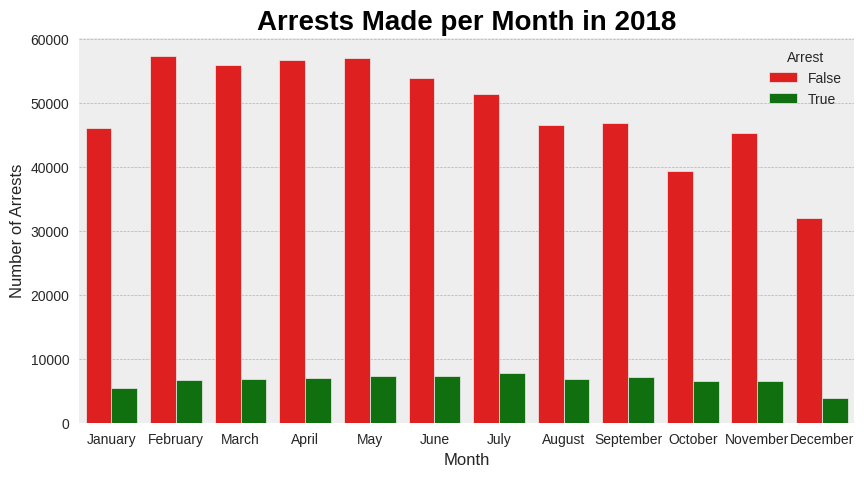

In [ ]:
# How are arrests spread out across the months
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="Month",
                   hue='Arrest',
                   data=df[['Month','Arrest']],
                   palette=['Red', 'Green'])
months = ['January','February','March','April','May','June','July',\
             'August','September','October','November','December']

ax.set(title='Arrests Made per Month in 2018', xlabel='Month', ylabel='Number of Arrests', xticklabels=months)
plt.title('Arrests Made per Month in 2018', fontdict={'fontsize': 20, 'color': 'black'}, weight="bold")
plt.show()

<h3>How do arrests vary among the type of crime ?</h3>

In [ ]:
# let's look at the pandas groupby function
#arrest_crime = df.groupby(['Primary Type', 'Arrest'])['ID'].count()
arrest_crime = df.groupby(['Primary Type', 'Arrest']).agg({'Arrest':"count"})
arrest_crime.columns = ["Count"]
# arrest_crime

In [ ]:
import math
# DataFrame
the_crimes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE', 'WEAPONS VIOLATION',
              'NARCOTICS', 'HOMICIDE', 'BURGLARY', 'MOTOR VEHICLE THEFT',
              'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN', 'ROBBERY', 'CRIMINAL TRESPASS',
              'INTERFERENCE WITH PUBLIC OFFICER', 'CRIMINAL SEXUAL ASSAULT', 'PUBLIC PEACE VIOLATION',
               'SEX OFFENSE', 'LIQUOR LAW VIOLATION', 'PUBLIC INDECENCY',
              'CONCEALED CARRY LICENSE VIOLATION', 'STALKING', 'INTIMIDATION', 'ARSON', 'KIDNAPPING', 'NON-CRIMINAL',
              'PROSTITUTION', 'HUMAN TRAFFICKING', 'OBSCENITY']

# Create the DataFrame arrest
arrest = pd.DataFrame(columns=['Crime', 'True', 'False'])

# First, we make our dataset
for i, crime in enumerate(the_crimes):
    subset = df[df['Primary Type'] == crime]

    if not subset.empty:
        true = subset['Arrest'].value_counts().sort_index().get(1, 0)
        false = subset['Arrest'].value_counts().sort_index().get(0, 0)

        temp_df = pd.DataFrame({'Crime': [crime], 'True': [true], 'False': [false]})
        arrest = pd.concat([arrest, temp_df], ignore_index=True)

# Calculate percentages
arrest['True_per'] = arrest['True'] / (arrest['True'] + arrest['False']) * 100
arrest['False_per'] = arrest['False'] / (arrest['True'] + arrest['False']) * 100

# Plot the dataset
def style(p):
    # Title
    p.title.align = 'center'
    p.title.text_font_size = '20pt'
    p.title.text_font = 'serif'

    # Axis titles
    p.xaxis.axis_label_text_font_size = '14pt'
    p.xaxis.axis_label_text_font_style = 'bold'
    p.yaxis.axis_label_text_font_size = '14pt'
    p.yaxis.axis_label_text_font_style = 'bold'

    # Tick labels
    p.xaxis.major_label_text_font_size = '12pt'
    p.yaxis.major_label_text_font_size = '12pt'

    return p

status = ['Arrested', 'Not Arrested']
arrest_cds = ColumnDataSource(arrest)
crimes = arrest_cds.data['Crime'].tolist()

fig2 = figure(x_range=crimes, width=1200, height=900,
              title='Arrests vs Crime Type',
              x_axis_label='Arrest Status', y_axis_label='Number of Crimes')
fig2.vbar_stack(stackers=['True', 'False'], x='Crime', width=0.25, legend_label=['Arrested', 'Not Arrested'],
                source=arrest_cds, color=['green', 'red'])
fig2.xaxis.major_label_orientation = math.pi / 2

tooltips = [('Crime', '@Crime'), ('Arrested Percentage', '@True_per'), ('Not Arrested Percentage', '@False_per')]
hover = HoverTool(tooltips=tooltips, mode='vline')
fig2.add_tools(hover)

# fig2 = style(fig2)

output_notebook()
show(fig2)


<h2>3. Crime vs Time</h2>
<h3>Distribution of crimes across the months</h3>

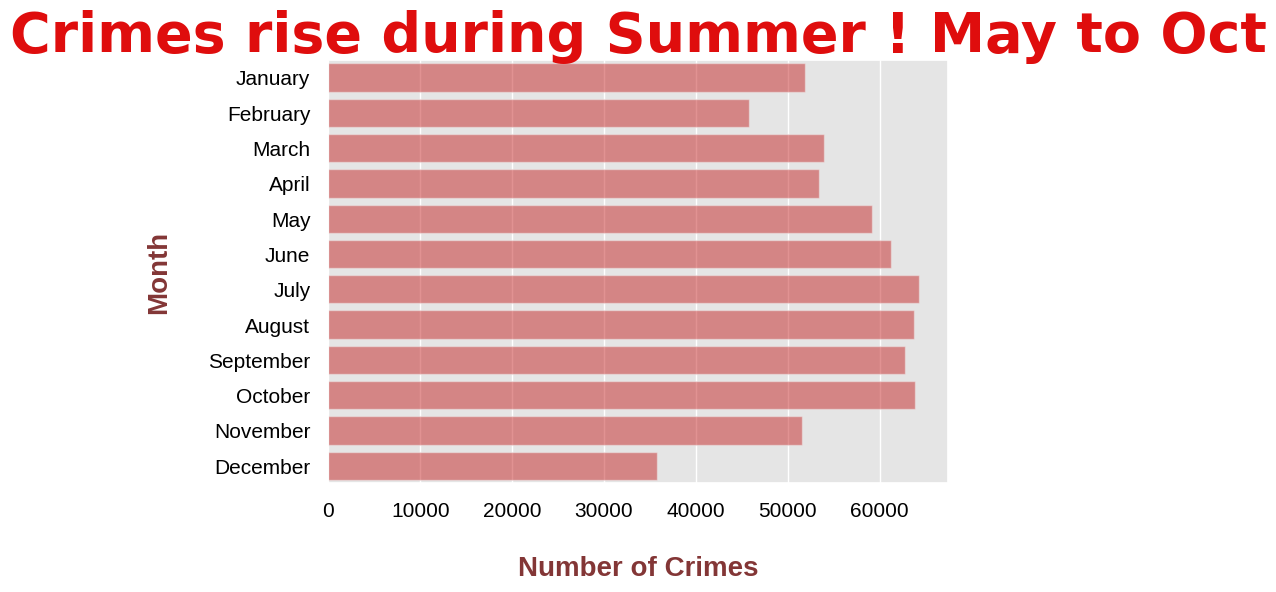

In [ ]:
# Set plot style
plt.style.use('ggplot')
sns.set_context('notebook')

# Code to plot
sns.countplot(y='Month', data=df, palette=["#DF0D0D"], order=['January', 'February', 'March', 'April', 'May', 'June', "July", 'August', 'September', 'October', 'November', 'December'], alpha=0.5)

# Aesthetic appeal of the plot
plt.title("Crimes rise during Summer ! May to Oct", fontdict={'fontsize': 40, 'color': '#DF0D0D', 'fontname':'Agency FB'}, weight="bold")
plt.ylabel("Month\n", fontdict={'fontsize': 20}, weight="bold", color="#833636")
plt.xlabel("\nNumber of Crimes", fontdict={'fontsize': 20}, weight="bold", color="#833636")

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15, color='black')
plt.show()

<p>The months of July,August,september and october have seen the most spike in crime rates in the city.<br>
It is very important here that we are able to make an intuitive observation that <strong>Crime rises in the Summer and fall</strong>!</p>

<h4>Create a new column "Hour" [24 hour format]</h4>

In [ ]:
def hour(x):
    return x.strftime("%H")
df['Hour_Day'] = df['Date'].apply(hour)

<ipython-input-36-5135c3b55537>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour_Day'] = df['Date'].apply(hour)


<h3>What are the most unsafest hours ?</h3>

<ipython-input-37-83aab529fd81>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


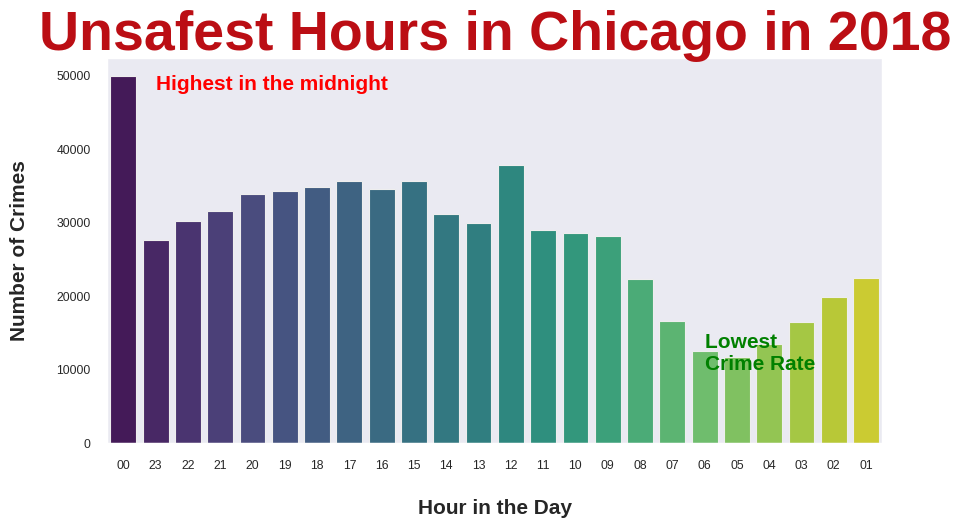

In [ ]:
# Set plot style
plt.style.use('seaborn-dark')
sns.set_context('paper')

# Write code to plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Hour_Day', data=df, palette="viridis")

# Aesthetic appeal
plt.title("Unsafest Hours in Chicago in 2018", fontdict={'fontsize': 40, 'color': '#bb0e14',}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")

# Add Text to the plot
plt.text(18, 10000, 'Lowest \nCrime Rate', fontdict={'fontsize': 15, 'color':"green" }, weight='bold')
plt.text(1, 48000, 'Highest in the midnight', fontdict={'fontsize': 15, 'color':"red" }, weight='bold')

plt.show()

<h3>Is your house safe from a burglary during the day ?</h3>

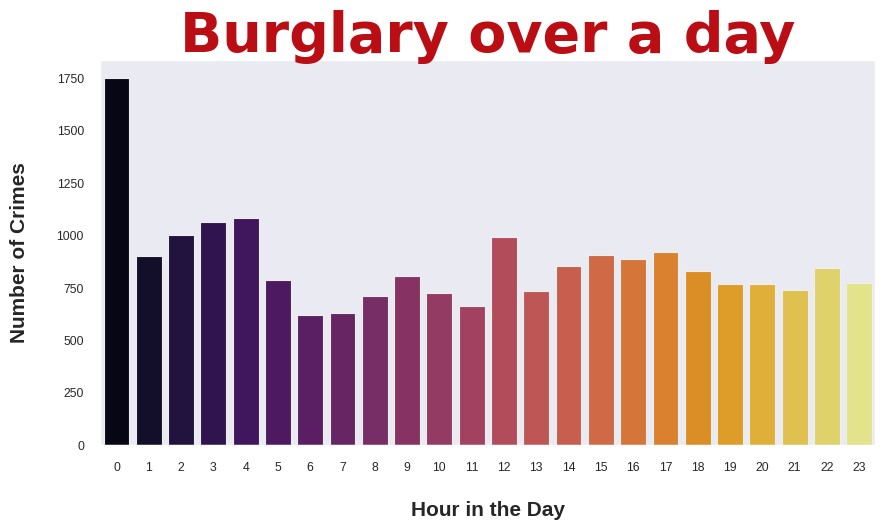

In [ ]:
# analyse only for burglary
burglary_df = df[df['Primary Type']=='BURGLARY']
hours = [int(x) for x in list(burglary_df['Hour_Day'].unique())]
hours = sorted(hours)
# print(hours)

bur_cri = list(burglary_df['Hour_Day'].value_counts().sort_index())
# print(bur_cri)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=hours, y=bur_cri, palette='inferno')

# Aesthetic appeal
plt.title("Burglary over a day", fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")

# show plot
plt.show()

No. Your house is not at all safe froma burglary during the midnight and day
. Infact, most burglaries happen consistently in sunlight!

Enter the crime you wish to see the 24 hour pattern off >> Narcotics


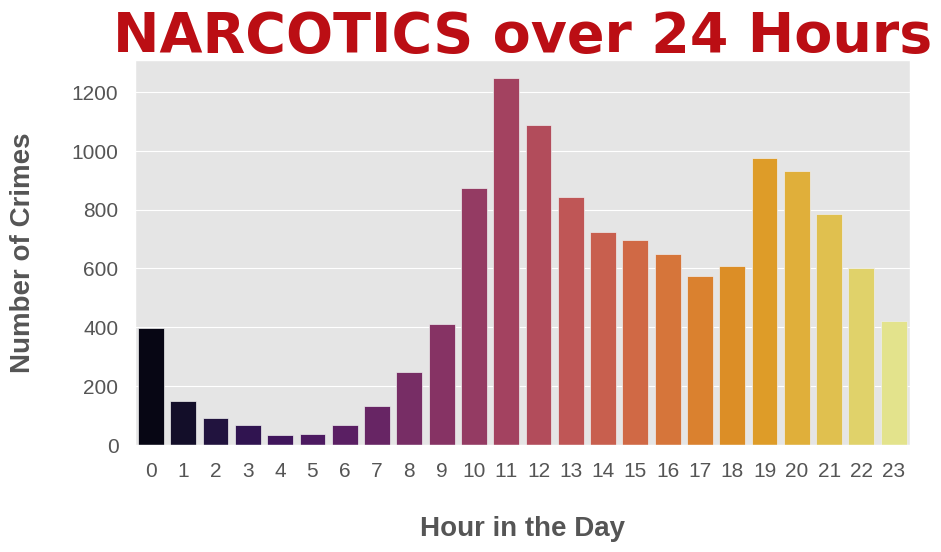

In [ ]:
#sns.set_style('darkgrid')
plt.style.use('ggplot')
# An analysis of the 24 hour pattern for crimes
c = input("Enter the crime you wish to see the 24 hour pattern off >> ")

crime_df = df[df['Primary Type']==c.upper()]
hours = [int(x) for x in list(crime_df['Hour_Day'].unique())]
hours = sorted(hours)
# print(hours)

h_cri = list(crime_df['Hour_Day'].value_counts().sort_index())
# print(bur_cri)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=hours, y=h_cri, palette='inferno')

# Aesthetic appeal
tit = c.upper()+" over 24 Hours"
plt.title(tit, fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 20}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 20}, weight="bold")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

# show plot
plt.show()

<h2>3. Crime vs Locations</h2>
<h3>A rough Chicago Map using the Location Co-ordinates</h3>

Enter the crime you wish to see the concentration of in the city >> Theft


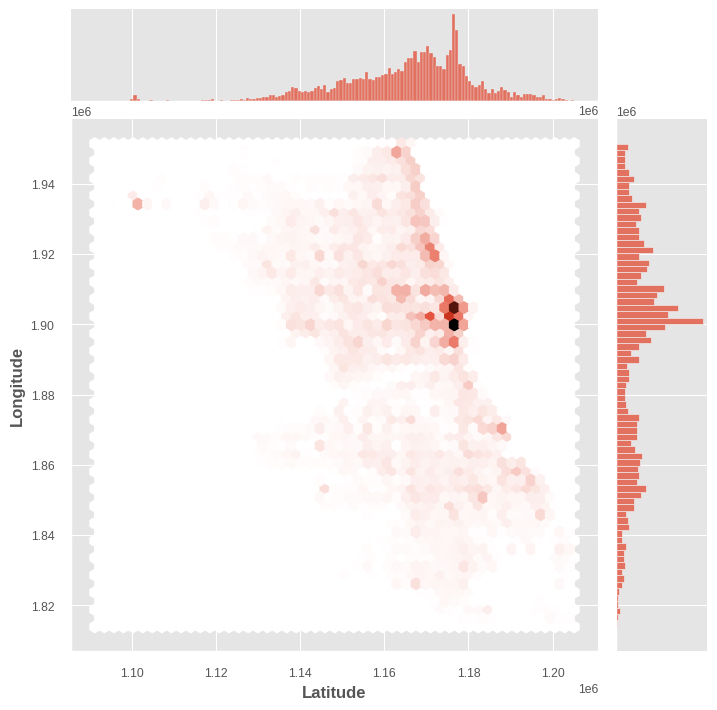

In [ ]:
# let's take in the crime as an input as always
c = input("Enter the crime you wish to see the concentration of in the city >> ")
crime_df = df[df['Primary Type']==c.upper()]

sns.jointplot(x=crime_df['X Coordinate'].values, y=crime_df['Y Coordinate'].values, height=7, kind='hex')

plt.xlabel("Latitude", fontdict={'fontsize': 12}, weight='bold')
plt.ylabel("Longitude", fontdict={'fontsize': 12}, weight="bold")
plt.show()

<h2> The Models </h2>







<h3>Classfication of Crime Type</h3>

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
tc = df['Primary Type'].value_counts().sort_values(ascending=False).head()
print(tc)

In [ ]:
X = df[['Arrest', 'Domestic', 'Beat', 'Community Area',
                   'Latitude', 'Longitude', 'Year', 'Hour_Day']]
y = df['Primary Type']

In [ ]:
X = X.fillna(0)
feature_names = list(X)
target_names = list(y)

In [ ]:
from sklearn.model_selection import train_test_split
seed = 55
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [ ]:
# International chigh profile
gang_crimes = ['NARCOTICS', 'HOMICIDE', 'WEAPONS VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION', 'KIDNAPPING', 'BURGLARY']
gang_df = df[df['Primary Type'].isin(gang_crimes)]
gang_df.shape

In [ ]:
# Local hgh profile
g_crimes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT','MOTOR VEHICLE THEFT','OFFENSE INVOLVING CHILDREN', 'ROBBERY', 'CRIMINAL TRESPASS',
              'INTERFERENCE WITH PUBLIC OFFICER', 'CRIMINAL SEXUAL ASSAULT','SEX OFFENSE', 'INTIMIDATION','PROSTITUTION', 'HUMAN TRAFFICKING']
g_df = df[df['Primary Type'].isin(g_crimes)]
g_df.shape

In [ ]:
# top crimes
t_crimes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT','MOTOR VEHICLE THEFT']
t_df = df[df['Primary Type'].isin(t_crimes)]
t_df.shape

In [ ]:
# Local public crimes
k_crimes = ['DECEPTIVE PRACTICE','OTHER OFFENSE','PUBLIC PEACE VIOLATION','LIQUOR LAW VIOLATION','PUBLIC INDECENCY','STALKING','ARSON','NON-CRIMINAL','OBSCENITY']
k_df = df[df['Primary Type'].isin(k_crimes)]
k_df.shape

In [ ]:
gang_df = gang_df[gang_df['Domestic']==False] # Domestic crimes are not usually gang crimes gang_df.shape

In [ ]:
k_df = k_df[k_df['Domestic']==True] # Domestic crimes most of it

In [ ]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                         zoom_start=11,
                         tiles="OpenStreetMap",
                         attr="Map data &copy; OpenStreetMap contributors, CC-BY-SA")

In [ ]:
chicago_map

In [ ]:
#for index, row in df[:1000].iterrows():
#    lat = row["Latitude"]
 #   long = row["Longitude"]
  #  print(lat, long)


In [ ]:
#2023

for index, row in df[:232346].iterrows():
    lat = row["Latitude"]
    long = row["Longitude"]
    #print(lat,long)
    popup_text = """Community Index: {}<br>
                   Block : {}<br>
                   Crime Description : {}<br>""".format(index, row['Block'], row['Primary Type'])

    folium.CircleMarker(location=[lat, long], popup=popup_text, fill=True).add_to(chicago_map)
chicago_map



In [ ]:
#2022


for index, row in df[:232345:471398].iterrows():
    lat = row["Latitude"]
    long = row["Longitude"]
    #print(lat,long)
    popup_text = """Community Index: {}<br>
                   Block : {}<br>
                   Crime Description : {}<br>""".format(index, row['Block'], row['Primary Type'])

    folium.CircleMarker(location=[lat, long], popup=popup_text, fill=True).add_to(chicago_map)
chicago_map


In [ ]:

#2021
for index, row in df[471397:625457].iterrows():
    lat = row["Latitude"]
    long = row["Longitude"]
    #print(lat,long)
    popup_text = """Community Index: {}<br>
                   Block : {}<br>
                   Crime Description : {}<br>""".format(index, row['Block'], row['Primary Type'])

    folium.CircleMarker(location=[lat, long], popup=popup_text, fill=True).add_to(chicago_map)
chicago_map

In [ ]:
# to edit  t_df june to october
for index, row in t_df[506161:601455].iterrows():
    lat = row["Latitude"]
    long = row["Longitude"]
    #print(lat,long)
    popup_text = """Community Index: {}<br>
                   Block : {}<br>
                   Crime Description : {}<br>""".format(index, row['Block'], row['Primary Type'])

    folium.CircleMarker(location=[lat, long], popup=popup_text, fill=True).add_to(chicago_map)

In [ ]:
chicago_map

In [ ]:
# Specify the path in your Google Drive where you want to save the HTML file
file_path = '/content/gdrive/MyDrive/Datasci/chicago_mapfin.html'

# Save the Folium map
chicago_map.save(file_path)


In [ ]:
# Save the Folium map
chicago_map.save("chicago_map.html")

# Download the HTML file
from google.colab import files
files.download("chicago_map.html")


In [ ]:
!pip install str
import str

In [ ]:
import json

df['Location'] = df['Location'].str.strip()
loc = []

for i in range(0, len(df['Location'])):
    location_str = df['Location'][i]

    # Check if the string is not empty
    if location_str:
        try:
            temp = json.loads(location_str)
            loc.append(temp)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON at index {i}: {e}")

locat = pd.Index(loc)  # to convert the array to an index


In [ ]:
%%time
chicago_map_crime = folium.Map(location=[41.895140898, 87.624255632],
                                zoom_start=13,
                                tiles="OpenStreetMap")
for i in range(len(CR_index["Raw_String"][:500])):
  lat = float(CR_index["Raw_String"][i].split(",")[0])
  long = float(CR_index["Raw_String"][i].split(",")[1])
  radius = float(CR_index['ValueCount'].iloc[i] /1)#corresponding circle size wrt crimes
  # print(radius)
  if CR_index['ValueCount'].iloc[i] > 5:
      color = "#FF4500" #red-high cime zone
  else:
       color="#008080" #blue

  popup_text = """Latitude: {}<br>
                Longitude: {}<br>
                Criminal Incidents: {}<br>"""
  popup_text = popup_text.format(lat,
                                  long,
                                  CR_index['ValueCount'].iloc[i]
                                  )
  folium.CircleMarker (location = [lat, long], popup= popup_text, radius = radius, color = color, fill = True).add_to(chicago_map_crime)